In [79]:
#import libraries
import pandas as pd
import numpy as np
import csv
import ast
import re
from prettytable import PrettyTable

import time

#spelling correction
import enchant
from spellchecker import SpellChecker
from autocorrect import Speller
from textblob import TextBlob


#data visualization libraries
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.io as pio
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

#NLP & ML libraries
from nltk import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics.pairwise import cosine_similarity

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [2]:
pd.reset_option('display.max_colwidth')
pd.reset_option ('display.max_column')

#pd.set_option('display.max_colwidth', None)

In [3]:
#import cleaned data

def list_converter(text):
    #to revert list->str conversion from pd.read_csv
    return ast.literal_eval(text)


data = pd.read_csv('Data/training_corpus.csv', converters ={'tokens':list_converter})

In [4]:
data = data.drop(columns = ['index'])
data

,text_type,ID,year,long_text,clean_text,word_count,tokens
0,comment,gtfo2hl,2021,"*Cuntry roads, take me hoem*",cuntry roads hoem,3,"[cuntry, road, hoem]"
1,comment,gtfqkbv,2021,"That’s been there for several years, sent a pi...",years sent pic cuntry friend long time ago,8,"[year, send, pic, cuntry, friend, long, time, ..."
2,comment,gtfou07,2021,I am single and I have not traveled to any cun...,single traveled cuntry past year,5,"[single, travel, cuntry, past, year]"
3,comment,gtfrgpe,2021,What happens when you shop at dragon mart...,happens shop dragon mart,4,"[happen, shop, dragon, mart]"
4,comment,gthiiwi,2021,"That’s just absolutely hilarious, is this in t...",absolutely hilarious springs souk,4,"[absolutely, hilarious, spring, souk]"
...,...,...,...,...,...,...,...
99181,submission,14f46ji,2023,"Best beauty saloons in Dubai? Hello fellas, I ...",best beauty saloons dubai hello fellas moved w...,35,"[good, beauty, saloon, dubai, hello, fellas, m..."
99182,submission,14f4uyi,2023,Found the r/dubai redditors who kept telling m...,found r dubai redditors kept telling know navi...,10,"[find, r, dubai, redditor, keep, tell, know, n..."
99183,submission,14f4ri3,2023,Scam ? Healthy.line My sister has a CBD debit ...,scam healthy line sister cbd debit card month ...,47,"[scam, healthy, line, sister, cbd, debit, card..."
99184,submission,14f4k3r,2023,Thoughts on Expo City properties? Anyone else ...,thoughts expo city properties checked expo cit...,21,"[thought, expo, city, property, check, expo, c..."


## **Bag of Words Model** (from Sklearn)

In [5]:
start_time = time.time()
#create instance of CountVectorizer
cv = CountVectorizer()

#convert list of tokenized words to strings
input_data = data['tokens'].apply(lambda token: ' '.join(token))

#create matrix of word vectors
X_bow = cv.fit_transform(input_data)

print ("The program took %.3f seconds to complete. The ngram representation had %i features." % (time.time() - start_time, X_bow.shape[1]))

The program took 1.667 seconds to complete. The ngram representation had 39810 features.


In [6]:
#get feature names
bow_features = cv.get_feature_names()

In [7]:
#tabular presentation of a sample of the bag of words representation
text_df = data['clean_text'].loc[8000:8004].copy()
bow_df = pd.DataFrame(X_bow[8000:8005].toarray(), columns = bow_features)

text_bow = bow_df.copy()
text_bow = text_bow.loc[:, (text_bow == 1).any()]

text_bow.insert(0, 'clean_text', text_df.values)

text_bow

,clean_text,agent,asian,asset,brodsky,buy,car,center,check,city,...,thing,time,town,trade,uni,village,visit,want,world,year
0,dubai world trade center expo site rest taken ...,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,uni enjoyed felt brodsky comopolitan like town...,0,0,0,1,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
2,visit aus fri aus,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,kind intrigued feel reluctant time car maybe y...,0,1,0,0,0,1,0,1,0,...,0,1,0,0,0,1,0,1,0,1
4,real estate agent rereading sounds pro real es...,1,0,1,0,1,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0


## **N-Grams Model** with Sklearn's CountVectorizer

### **Bi-Grams**

In [8]:
start_time = time.time()
# create bi_gram instance of CountVectorizer
bi_cv = CountVectorizer(analyzer = 'word', ngram_range = (2,2))

#create matrix of word vectors
X_bigram = bi_cv.fit_transform(input_data)

print ("The program took %.3f seconds to complete. The ngram representation had %i features." % (time.time() - start_time, X_bigram.shape[1]))

The program took 6.570 seconds to complete. The ngram representation had 771375 features.


In [9]:
#get feature names
bigram_features = bi_cv.get_feature_names()

#tabular presentation of a sample of the bag of words representation

bigram_df = pd.DataFrame(X_bigram[8000:8005].toarray(), columns = bigram_features)

text_bigram = bigram_df.copy()
text_bigram = text_bigram.loc[:, (text_bigram == 1).any()]

text_bigram.insert(0, 'clean_text', text_df.values)

text_bigram

,clean_text,agent rereading,asian village,asset price,aus fri,brodsky comopolitan,buy peak,car maybe,center expo,chance repricing,...,time car,time stay,town city,trade center,uni enjoy,village goody,visit aus,want check,world trade,year want
0,dubai world trade center expo site rest taken ...,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,uni enjoyed felt brodsky comopolitan like town...,0,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,visit aus fri aus,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,kind intrigued feel reluctant time car maybe y...,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,1,0,1
4,real estate agent rereading sounds pro real es...,1,0,1,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0


### **N-Grams(UniGrams, BiGrams, TriGrams)**

In [10]:
start_time = time.time()
# create bi_gram instance of CountVectorizer
ngram_cv = CountVectorizer(analyzer = 'word', ngram_range = (1,3))


#create matrix of word vectors
X_ngram = ngram_cv.fit_transform(input_data)

print ("The program took %.3f seconds to complete. The ngram representation had %i features." % (time.time() - start_time, X_ngram.shape[1]))

The program took 14.590 seconds to complete. The ngram representation had 1946902 features.


In [11]:
#get feature names
ngram_features = ngram_cv.get_feature_names()

#tabular presentation of a sample of the bag of words representation

ngram_df = pd.DataFrame(X_ngram[8000:8005].toarray(), columns = ngram_features)

text_ngram = ngram_df.copy()
text_ngram = text_ngram.loc[:, (text_ngram == 1).any()]

text_ngram.insert(0, 'clean_text', text_df.values)

text_ngram

,clean_text,agent,agent rereading,agent rereading sound,asian,asian village,asian village goody,asset,asset price,asset price historically,...,visit aus fri,want,want check,want check asian,world,world trade,world trade center,year,year want,year want check
0,dubai world trade center expo site rest taken ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,0,0,0
1,uni enjoyed felt brodsky comopolitan like town...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,visit aus fri aus,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,kind intrigued feel reluctant time car maybe y...,0,0,0,1,1,1,0,0,0,...,0,1,1,1,0,0,0,1,1,1
4,real estate agent rereading sounds pro real es...,1,1,1,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


## **Tfidf Model (from Sklearn)**

In [12]:
start_time = time.time()
#create instance of CountVectorizer
tfidf = TfidfVectorizer()

#convert list of tokenized words to strings
input_data = data['tokens'].apply(lambda token: ' '.join(token))

#create matrix of word vectors
X_tfidf = tfidf.fit_transform(input_data)

print ("The program took %.3f seconds to complete. The ngram representation had %i features." % (time.time() - start_time, X_tfidf.shape[1]))

The program took 2.072 seconds to complete. The ngram representation had 39810 features.


In [13]:
#get feature names
tfidf_features = tfidf.get_feature_names()

#tabular presentation of a sample of the bag of words representation

tfidf_df = pd.DataFrame(X_tfidf[8000:8005].toarray(), columns = tfidf_features)

text_tfidf = tfidf_df.copy()
text_tfidf = text_tfidf.loc[:, (text_tfidf > 0.05).any()]

#text_tfidf.insert(0, 'clean_text', text_tfidf.values)

text_tfidf

,agent,asian,asset,aus,brodsky,buy,car,center,chance,check,...,think,time,town,trade,uni,village,visit,want,world,year
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.317816,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.341847,0.000000,0.000000,0.000000,0.000000,0.232162,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.537782,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.331413,0.000000,0.350242,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.830933,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.276782,0.000000,0.000000,0.000000
3,0.000000,0.276984,0.000000,0.000000,0.000000,0.000000,0.182507,0.000000,0.000000,0.207676,...,0.000000,0.152056,0.000000,0.000000,0.000000,0.302969,0.000000,0.161931,0.000000,0.164741
4,0.112671,0.000000,0.127795,0.000000,0.000000,0.082638,0.000000,0.000000,0.207339,0.000000,...,0.248493,0.062523,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


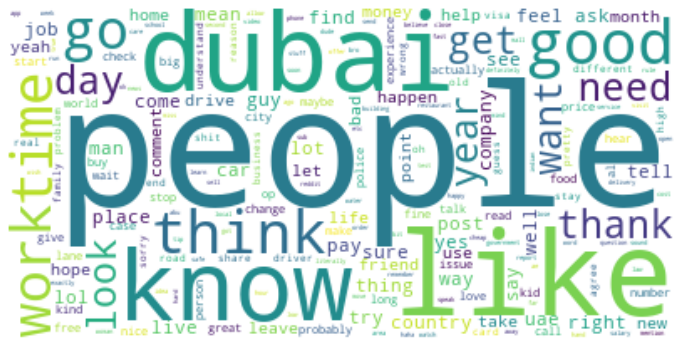

In [14]:
#visualize most common words in a wordcloud

# Calculate the TF-IDF scores for each word
word_scores = zip(tfidf_features, X_tfidf.sum(axis = 0).A1)

# Create a dictionary with word scores
word_scores_dict = dict(word_scores)

# Create an instance of WordCloud with the TF-IDF scores as input
wordcloud = WordCloud(background_color="white").generate_from_frequencies(word_scores_dict)

# Plot the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

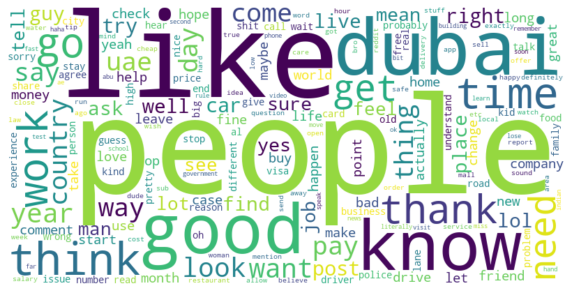

In [15]:
# Calculate word scores based on TF-IDF matrix
word_scores = zip(tfidf_features, X_tfidf.sum(axis=0).A1)

# Sort word scores in descending order
word_scores = sorted(word_scores, key=lambda x: x[1], reverse=True)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(word_scores))

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [44]:
#common words - tfidfvectorizer
# Calculate word scores based on TF-IDF matrix
word_scores = zip(tfidf_features, X_tfidf.sum(axis=0).A1)

# Sort word scores in descending order
word_scores = sorted(word_scores, key=lambda x: x[1], reverse=True)

#common words - NLKT freqDist
#list of all words in the dataframe
all_words = [word for token_row in data['tokens'] for word in token_row]

#frequency of word occurrence
fdist = FreqDist(all_words)

common_words = fdist.most_common(20)

#table of common words
common_words_table = PrettyTable(['word', 'counter', 'tfidf_frequency'])

for word, tfidf_score in word_scores[:21]:
    counter_freq = dict(common_words).get(word, 0)
    common_words_table.add_row([word, counter_freq, tfidf_score])

print (common_words_table)

+---------+---------+--------------------+
|   word  | counter |  tfidf_frequency   |
+---------+---------+--------------------+
|  people |  14992  | 1612.8179038314854 |
|   like  |  13465  | 1597.2731633245871 |
|  dubai  |  12342  | 1585.1996305155683 |
|   know  |   9402  | 1271.7619671012449 |
|   good  |   8551  | 1249.1988705669376 |
|  think  |   7856  | 1116.8447932446527 |
|   time  |   8111  | 1045.2616981669294 |
|   work  |   7311  | 954.1518767974476  |
|    go   |   7061  | 949.9218353169325  |
|  thank  |    0    |  905.424824890721  |
|   get   |   5911  | 885.1792120889845  |
|   need  |   6023  | 869.9753757833951  |
|   year  |   6255  | 859.9439938873322  |
|   want  |   6318  | 859.3558242540796  |
|   look  |    0    | 854.9391954797641  |
|   day   |   5406  | 820.7879178530802  |
| country |   6402  | 812.6973928228693  |
|   uae   |   6133  |  803.314127012206  |
|  thing  |   5666  | 793.5677037412743  |
|   pay   |   5591  | 774.1624165576967  |
|   way   |

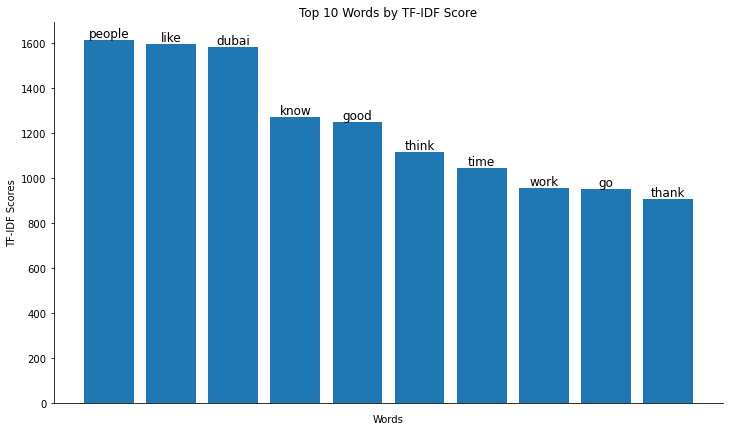

In [46]:
#default plot settings

pio.templates.default = "plotly_white"

import matplotlib as mpl

#do not display right and top spines
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True
mpl.rcParams['axes.spines.left'] = True


# Extract the top 10 words and scores
top_words = [word for word, _ in word_scores[:10]]
top_scores = [score for _, score in word_scores[:10]]

# Plot the bar chart
plt.figure(figsize=(12, 7))
plt.bar(range(len(top_words)), top_scores)
plt.xticks(range(len(top_words)), top_words)
plt.xlabel('Words')
plt.ylabel('TF-IDF Scores')
plt.title('Top 10 Words by TF-IDF Score')

# Remove the x-axis labels
plt.gca().axes.xaxis.set_ticklabels([])

# Remove small vertical ticks on the x-axis
plt.tick_params(axis='x', which='both', bottom=False, top=False)


# Add the word labels on top of each bar
# Add the word labels on top of each bar
for i, word in enumerate(top_words):
    plt.text(i, top_scores[i], word, ha='center', va='bottom', fontsize = 12)


# Display the plot
plt.show()


In [63]:
#documents most likely relating to accomodation/energy

word2 = 'DEWA'
doc_index2 = []
for i,doc in enumerate(data['clean_text']):
    if word2.lower() in doc.split():
        doc_index2.append(i)
print (doc_index2)

[1212, 2414, 2439, 2768, 3346, 3347, 8148, 8943, 9581, 14720, 14729, 14731, 14734, 14737, 14743, 14744, 14750, 14765, 14770, 14774, 14787, 14791, 14806, 14812, 14840, 14841, 14843, 14847, 14852, 15461, 15462, 15463, 15473, 15474, 15483, 15484, 15489, 15494, 15498, 15499, 16204, 18001, 19138, 22727, 22977, 26007, 26058, 29757, 30694, 34057, 35612, 39839, 41506, 41998, 42017, 42058, 42752, 44695, 44811, 46279, 46427, 46463, 46702, 47228, 47237, 47241, 49786, 50981, 53424, 53447, 53458, 53626, 53943, 54382, 55210, 55337, 57074, 58923, 59883, 59888, 62067, 62132, 63697, 64922, 64923, 64924, 69950, 69951, 69953, 69954, 69955, 69957, 69959, 69961, 69963, 69964, 69967, 69968, 69975, 69980, 69988, 70517, 72029, 72051, 75406, 75436, 75476, 75882, 75883, 75886, 75887, 76482, 77839, 79297, 81750, 82051, 82237, 82370, 82470, 82483, 84206, 84320, 89231, 89244, 89245, 89247, 89319, 92645, 94272, 94276, 94279, 94379, 94428, 95424, 95840, 96092, 96178, 96249, 96568, 96585, 96771, 97016, 97019, 97041, 

In [83]:
#documents most likely relating to work

word3 = 'hospital'
doc_index3 = []
for i,doc in enumerate(data['clean_text']):
    if word3.lower() in doc.split():
        doc_index3.append(i)
print (doc_index3)

[2541, 3334, 4551, 5243, 5501, 6110, 6743, 8524, 8711, 9558, 10089, 10797, 10807, 11506, 11657, 11972, 11974, 11982, 11988, 11996, 12006, 12033, 12606, 13570, 13599, 15808, 16062, 16719, 18642, 19678, 19700, 19714, 20427, 20611, 21576, 21582, 21583, 21586, 21593, 21607, 21616, 21618, 21624, 21642, 21646, 21648, 21658, 21668, 21676, 21677, 21683, 21684, 21685, 21691, 21704, 22364, 23234, 24579, 24581, 24590, 24616, 25294, 25554, 27025, 27614, 27633, 27868, 27953, 28947, 29065, 29346, 30390, 30423, 30466, 30768, 32394, 32396, 32398, 32400, 32409, 32412, 32903, 33384, 33392, 34219, 34426, 37158, 37197, 37676, 39015, 39203, 39758, 40013, 40062, 40064, 40070, 40214, 40268, 40358, 40411, 40414, 40428, 40438, 40443, 40446, 40451, 40457, 40459, 40482, 40485, 40486, 40491, 40497, 40498, 40499, 40695, 40952, 40969, 41096, 41097, 41098, 41100, 41105, 41108, 41110, 41756, 41759, 41760, 41761, 41782, 42830, 42948, 42963, 43048, 43050, 43051, 43052, 43054, 43056, 43059, 43060, 44820, 45126, 45203, 4

In [89]:
#pd.reset_option('display.max_colwidth')

health_df = data.loc[data.index.isin(doc_index3)].copy()
health_df['subject'] = 'health'

,text_type,ID,year,long_text,clean_text,word_count,tokens
2541,comment,i39ionv,2022,You mean like move over for the emergency vehi...,mean like emergency vehicles trying people hos...,7,"[mean, like, emergency, vehicle, try, people, ..."
3334,comment,gyhay4l,2021,I am not responsible to prove my disease or my...,responsible prove disease financial situation ...,25,"[responsible, prove, disease, financial, situa..."
4551,comment,elfr5fj,2019,Are hospital emergency rooms there called *ham...,hospital emergency rooms called hamburger,5,"[hospital, emergency, room, call, hamburger]"
5243,comment,g44z0ju,2020,"Ohh man, I remember my uncle telling me the st...",ohh man remember uncle telling story local lad...,45,"[ohh, man, remember, uncle, tell, story, local..."
5501,comment,impwja2,2022,Lol. Go to Google maps and see the coverage Du...,lol google maps coverage dubailand currently a...,54,"[lol, google, maps, coverage, dubailand, curre..."
...,...,...,...,...,...,...,...
98609,submission,hhc01g,2020,What if BR Shetty is innocent? (Not The Onion)...,br shetty innocent onion lubna hamdan know thi...,349,"[br, shetty, innocent, onion, lubna, hamdan, k..."
98692,submission,k6mlkp,2020,New medical center opens in Dubai! \n\nA new...,new medical center opens dubai new medical cen...,91,"[new, medical, center, open, dubai, new, medic..."
98772,submission,ljqt7l,2021,Dubai radio presenter Catboy spent a week in h...,dubai radio presenter catboy spent week hospit...,8,"[dubai, radio, presenter, catboy, spend, week,..."
98838,submission,kwj04p,2021,UAE doctors new life saving narrative The Clev...,uae doctors new life saving narrative clevelan...,51,"[uae, doctor, new, life, saving, narrative, cl..."


In [107]:
#pd.reset_option('display.max_colwidth')
dewa_df = data.loc[data.index.isin(doc_index2)].copy()
dewa_df['subject'] = 'dewa'
dewa_df

,text_type,ID,year,long_text,clean_text,word_count,tokens,subject
1212,comment,gofpprv,2021,Few questions:\n\n1. Why is life insurance man...,questions life insurance mandatory happen tran...,67,"[question, life, insurance, mandatory, happen,...",dewa
2414,comment,i3bxqe0,2022,1. Make WhatsApp calls and Skype available for...,whatsapp calls skype available free let people...,48,"[whatsapp, call, skype, available, free, let, ...",dewa
2439,comment,i3c8bmd,2022,1) Minimum salary allocation according to degr...,minimum salary allocation according degree exp...,81,"[minimum, salary, allocation, accord, degree, ...",dewa
2768,comment,g22n9ba,2020,One answer could be: The simp who went to pay ...,answer simp went pay dewa bill tinder match,8,"[answer, simp, go, pay, dewa, bill, tinder, ma...",dewa
3346,comment,io9wa3i,2022,DEWA going IPO?,dewa going ipo,3,"[dewa, go, ipo]",dewa
...,...,...,...,...,...,...,...,...
97320,submission,12cj5es,2023,DEWA's Key Performance Indicators Outperform M...,dewa s key performance indicators outperform m...,44,"[dewa, s, key, performance, indicator, outperf...",dewa
97344,submission,11mpsa6,2023,"Rent Issue \n\nHi guys,\n\nI recently rented ...",rent issue hi guys recently rented apartment d...,51,"[rent, issue, hi, guy, recently, rent, apartme...",dewa
97573,submission,xka3mz,2022,"Update and need advice Hellooo again. So, I re...",update need advice hellooo recently posted dew...,49,"[update, need, advice, hellooo, recently, post...",dewa
98164,submission,p3h5s7,2021,Trying to find the right type of place to live...,trying find right type place live dubai obviou...,178,"[try, find, right, type, place, live, dubai, o...",dewa


In [94]:
dewa_health = pd.concat([dewa_df, health_df])
dewa_health

,text_type,ID,year,long_text,clean_text,word_count,tokens
1212,comment,gofpprv,2021,Few questions:\n\n1. Why is life insurance man...,questions life insurance mandatory happen tran...,67,"[question, life, insurance, mandatory, happen,..."
2414,comment,i3bxqe0,2022,1. Make WhatsApp calls and Skype available for...,whatsapp calls skype available free let people...,48,"[whatsapp, call, skype, available, free, let, ..."
2439,comment,i3c8bmd,2022,1) Minimum salary allocation according to degr...,minimum salary allocation according degree exp...,81,"[minimum, salary, allocation, accord, degree, ..."
2768,comment,g22n9ba,2020,One answer could be: The simp who went to pay ...,answer simp went pay dewa bill tinder match,8,"[answer, simp, go, pay, dewa, bill, tinder, ma..."
3346,comment,io9wa3i,2022,DEWA going IPO?,dewa going ipo,3,"[dewa, go, ipo]"
...,...,...,...,...,...,...,...
98609,submission,hhc01g,2020,What if BR Shetty is innocent? (Not The Onion)...,br shetty innocent onion lubna hamdan know thi...,349,"[br, shetty, innocent, onion, lubna, hamdan, k..."
98692,submission,k6mlkp,2020,New medical center opens in Dubai! \n\nA new...,new medical center opens dubai new medical cen...,91,"[new, medical, center, open, dubai, new, medic..."
98772,submission,ljqt7l,2021,Dubai radio presenter Catboy spent a week in h...,dubai radio presenter catboy spent week hospit...,8,"[dubai, radio, presenter, catboy, spend, week,..."
98838,submission,kwj04p,2021,UAE doctors new life saving narrative The Clev...,uae doctors new life saving narrative clevelan...,51,"[uae, doctor, new, life, saving, narrative, cl..."


In [102]:
#indices of entries in dewa_health dataframe
sub_indices = dewa_health.index.values.tolist()


### **COSINE SIMILARITY INDEX**

In [91]:
# Initialize an instance of tf-idf Vectorizer
tfidf_vectorizer = TfidfVectorizer()

#convert list of tokenized words to strings
corpus= dewa_health['tokens'].apply(lambda token: ' '.join(token))

# Generate the tf-idf vectors for the corpus
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

# compute and print the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print(cosine_sim)

[[1.         0.08534401 0.05399431 ... 0.         0.0242383  0.01516124]
 [0.08534401 1.         0.07659656 ... 0.         0.02767788 0.02115601]
 [0.05399431 0.07659656 1.         ... 0.         0.         0.0058071 ]
 ...
 [0.         0.         0.         ... 1.         0.03268781 0.02747067]
 [0.0242383  0.02767788 0.         ... 0.03268781 1.         0.0019282 ]
 [0.01516124 0.02115601 0.0058071  ... 0.02747067 0.0019282  1.        ]]


In [96]:
cosine_sim.shape

(435, 435)

## **Word Embeddings (using SpaCy's Word2Vec)**

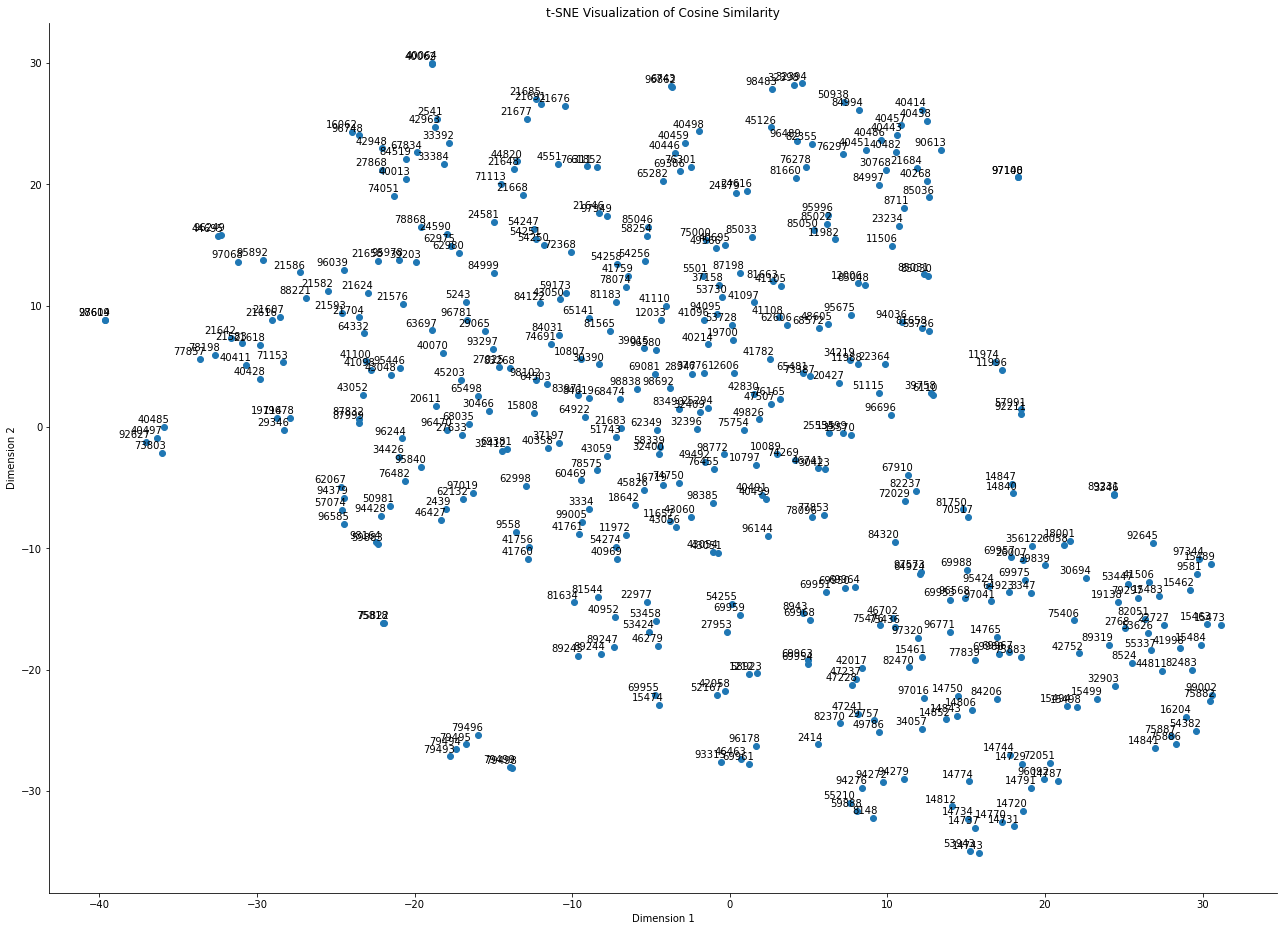

In [120]:
# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(cosine_sim)

plt.figure(figsize=(22, 16))

# Plot the t-SNE embeddings
plt.scatter(tsne_result[:, 0], tsne_result[:, 1])

# Annotate each point with the corresponding document index
for i, index in enumerate(sub_indices):
    plt.annotate(str(index), xy=(tsne_result[i, 0], tsne_result[i, 1]), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom')

plt.title('t-SNE Visualization of Cosine Similarity')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

#save plot as image
plt.savefig('Data/tfidf_cosine_similarity_tsne.png') 

plt.show()

In [119]:
#pd.reset_option('display.max_colwidth')
#pd.set_option('display.max_colwidth', None)
indx = [62067,94379,57074,96585]
dewa_health.loc[indx]

,text_type,ID,year,long_text,clean_text,word_count,tokens
62067,comment,fv1wn2n,2020,These people live is groups in shared accommod...,people live groups shared accommodation pay li...,61,"[people, live, group, share, accommodation, pa..."
94379,comment,ghz3ws4,2021,Well UAE can be Downtown Dubai or Emirates Hil...,uae downtown dubai emirates hills palm jumeira...,88,"[uae, downtown, dubai, emirates, hills, palm, ..."
57074,comment,j4o67su,2023,Groceries - AED 500\nRent - 1200 (Share a stud...,groceries aed rent share studio friend dewa ph...,36,"[grocery, ae, rent, share, studio, friend, dew..."
96585,submission,mzu79v,2021,[25M] Cost of Living Life Hacks in Dubai Reddi...,cost living life hacks dubai redditors dubai n...,40,"[cost, living, life, hack, dubai, redditor, du..."
